# Import

In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
from pandas import MultiIndex, Int64Index
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas.testing as tm
import time
import os
import psutil
import csv
import codecs

from memory_profiler import profile
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from scipy import interp
from wordcloud import WordCloud
from sklearn.utils import shuffle
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')

C:\Users\luyuh\AppData\Local\Temp\ipykernel_17968\1119316307.py:6: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\luyuh\Downloads\Anaconda\Anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Dataset 1

In [2]:
DS1_LR_df    = pd.read_csv('DS1_LR_df')
DS1_LSVM_df  = pd.read_csv('DS1_LSVM_df')
DS1_MLP_df   = pd.read_csv('DS1_MLP_df')
DS1_KNN_df   = pd.read_csv('DS1_KNN_df')
DS1_RF_df    = pd.read_csv('DS1_RF_df')
DS1_VOT_1_df = pd.read_csv('DS1_VOT_1_df')
DS1_VOT_2_df = pd.read_csv('DS1_VOT_2_df')
DS1_BAGG_df  = pd.read_csv('DS1_BAGG_df')
DS1_ADA_df   = pd.read_csv('DS1_ADA_df')
DS1_XG_df    = pd.read_csv('DS1_XG_df')

In [3]:
DS1_LR_df.index = list(DS1_LR_df["Unnamed: 0"])
DS1_LR_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS1_LSVM_df.index = list(DS1_LSVM_df["Unnamed: 0"])
DS1_LSVM_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS1_MLP_df.index = list(DS1_MLP_df["Unnamed: 0"])
DS1_MLP_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS1_KNN_df.index = list(DS1_KNN_df["Unnamed: 0"])
DS1_KNN_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS1_RF_df.index = list(DS1_RF_df["Unnamed: 0"])
DS1_RF_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS1_VOT_1_df.index = list(DS1_VOT_1_df["Unnamed: 0"])
DS1_VOT_1_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS1_VOT_2_df.index = list(DS1_VOT_2_df["Unnamed: 0"])
DS1_VOT_2_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS1_BAGG_df.index = list(DS1_BAGG_df["Unnamed: 0"])
DS1_BAGG_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS1_ADA_df.index = list(DS1_ADA_df["Unnamed: 0"])
DS1_ADA_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS1_XG_df.index = list(DS1_XG_df["Unnamed: 0"])
DS1_XG_df.drop('Unnamed: 0',axis = 1,inplace = True)

In [4]:
DS1_LR_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
LR (BoW) (n=1),0.992,0.997,0.988,0.992,1.961,0.020
LR (BoW) (n=2),0.868,0.840,0.920,0.878,3.993,0.031
LR (BoW) (n=3),0.729,0.959,0.496,0.654,3.268,0.039
LR (TF-IDF) (n=1),0.981,0.978,0.985,0.981,1.952,0.008
LR (TF-IDF) (n=2),0.871,0.857,0.899,0.878,2.642,0.012
LR (TF-IDF) (n=3),0.728,0.961,0.493,0.652,3.082,0.004


In [5]:
DS1_LSVM_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
LSVM (BoW) (n=1),0.992,0.998,0.986,0.992,34.064,18.809
LSVM (BoW) (n=2),0.867,0.838,0.921,0.878,9.224,9.883
LSVM (BoW) (n=3),0.728,0.959,0.496,0.654,8.161,9.848
LSVM (TF-IDF) (n=1),0.987,0.986,0.989,0.987,1.828,9.844
LSVM (TF-IDF) (n=2),0.871,0.858,0.899,0.878,1.057,9.602
LSVM (TF-IDF) (n=3),0.728,0.961,0.493,0.652,0.933,9.609


In [6]:
DS1_MLP_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
MLP (BoW) (n=1),0.993,0.992,0.993,0.993,106.860,1.348
MLP (BoW) (n=2),0.878,0.843,0.938,0.888,124.042,0.051
MLP (BoW) (n=3),0.715,0.656,0.944,0.774,113.056,0.004
MLP (TF-IDF) (n=1),0.937,0.894,0.996,0.942,103.141,0.215
MLP (TF-IDF) (n=2),0.875,0.838,0.939,0.886,112.972,0.023
MLP (TF-IDF) (n=3),0.714,0.656,0.939,0.772,104.987,0.027


In [7]:
DS1_KNN_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
KNN (BoW) (n=1),0.903,0.943,0.865,0.902,19.942,0.020
KNN (BoW) (n=2),0.856,0.826,0.914,0.868,21.501,0.449
KNN (BoW) (n=3),0.713,0.655,0.938,0.771,19.117,0.008
KNN (TF-IDF) (n=1),0.897,0.935,0.860,0.896,20.917,0.000
KNN (TF-IDF) (n=2),0.861,0.843,0.898,0.869,20.945,0.000
KNN (TF-IDF) (n=3),0.703,0.647,0.937,0.765,19.712,0.008


In [8]:
DS1_RF_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
RF (BoW) (n=1),0.995,0.998,0.993,0.996,27.450,1.219
RF (BoW) (n=2),0.890,0.861,0.937,0.898,24.946,2.344
RF (BoW) (n=3),0.737,0.952,0.517,0.670,22.635,0.027
RF (TF-IDF) (n=1),0.996,0.998,0.993,0.996,59.886,12.703
RF (TF-IDF) (n=2),0.890,0.864,0.933,0.897,36.627,27.762
RF (TF-IDF) (n=3),0.737,0.955,0.515,0.669,29.853,14.375


In [9]:
DS1_VOT_1_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
Voting 1 (BoW) (n=1),0.994,0.998,0.990,0.994,60.934,18.855
Voting 1 (BoW) (n=2),0.882,0.852,0.934,0.892,65.100,35.914
Voting 1 (BoW) (n=3),0.737,0.952,0.516,0.670,52.303,43.039
Voting 1 (TF-IDF) (n=1),0.988,0.989,0.988,0.988,100.259,57.051
Voting 1 (TF-IDF) (n=2),0.882,0.863,0.919,0.890,68.849,31.309
Voting 1 (TF-IDF) (n=3),0.734,0.960,0.506,0.663,54.268,2.270


In [10]:
DS1_VOT_2_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
Voting 2 (BoW) (n=1),0.993,0.998,0.988,0.993,38.346,44.742
Voting 2 (BoW) (n=2),0.868,0.840,0.920,0.878,14.942,43.129
Voting 2 (BoW) (n=3),0.729,0.959,0.496,0.654,12.849,43.176
Voting 2 (TF-IDF) (n=1),0.987,0.986,0.989,0.988,11.558,44.680
Voting 2 (TF-IDF) (n=2),0.872,0.858,0.901,0.879,6.891,43.164
Voting 2 (TF-IDF) (n=3),0.728,0.961,0.494,0.652,6.971,43.047


In [11]:
DS1_BAGG_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
Bagging (BoW) (n=1),0.996,0.998,0.993,0.996,198.237,5.359
Bagging (BoW) (n=2),0.884,0.855,0.934,0.892,93.114,17.766
Bagging (BoW) (n=3),0.736,0.948,0.517,0.670,88.212,16.043
Bagging (TF-IDF) (n=1),0.995,0.998,0.993,0.996,476.377,2.730
Bagging (TF-IDF) (n=2),0.888,0.862,0.933,0.896,174.286,0.008
Bagging (TF-IDF) (n=3),0.736,0.953,0.515,0.669,101.936,0.668


In [12]:
DS1_ADA_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
AdaBoost (BoW) (n=1),0.992,0.997,0.988,0.992,22.414,0.148
AdaBoost (BoW) (n=2),0.867,0.835,0.925,0.877,15.570,0.039
AdaBoost (BoW) (n=3),0.726,0.956,0.493,0.650,15.243,0.406
AdaBoost (TF-IDF) (n=1),0.992,0.997,0.987,0.992,53.207,0.000
AdaBoost (TF-IDF) (n=2),0.872,0.851,0.912,0.881,29.067,0.004
AdaBoost (TF-IDF) (n=3),0.732,0.960,0.501,0.659,22.312,0.000


In [13]:
DS1_XG_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
XGBoost (BoW) (n=1),0.995,0.997,0.994,0.995,35.989,8.977
XGBoost (BoW) (n=2),0.884,0.857,0.930,0.892,29.295,0.406
XGBoost (BoW) (n=3),0.735,0.956,0.511,0.666,25.485,0.137
XGBoost (TF-IDF) (n=1),0.995,0.998,0.993,0.996,61.531,0.180
XGBoost (TF-IDF) (n=2),0.884,0.856,0.932,0.893,38.389,4.770
XGBoost (TF-IDF) (n=3),0.736,0.955,0.514,0.668,25.311,0.051


In [14]:
DS1_res_df = pd.concat([DS1_LR_df, DS1_LSVM_df, DS1_MLP_df, DS1_KNN_df, DS1_RF_df, DS1_VOT_1_df, DS1_VOT_2_df, DS1_BAGG_df, DS1_ADA_df, DS1_XG_df]).sort_values(by=['Accuracy','F1-score'],ascending=False)
DS1_res_df['LM'] = DS1_res_df.index.map(lambda x : x.split('(')[1][:-2])
DS1_res_df['N']  = DS1_res_df.index.map(lambda x : x[-2:-1])
DS1_res_df['ML'] = DS1_res_df.index.map(lambda x : x.split('(')[0][:].strip())
DS1_res_df['DS'] = '1'

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
RF (TF-IDF) (n=1),0.996,0.998,0.993,0.996,59.886,12.703
Bagging (BoW) (n=1),0.996,0.998,0.993,0.996,198.237,5.359
RF (BoW) (n=1),0.995,0.998,0.993,0.996,27.450,1.219
Bagging (TF-IDF) (n=1),0.995,0.998,0.993,0.996,476.377,2.730
XGBoost (TF-IDF) (n=1),0.995,0.998,0.993,0.996,61.531,0.180
XGBoost (BoW) (n=1),0.995,0.997,0.994,0.995,35.989,8.977
Voting 1 (BoW) (n=1),0.994,0.998,0.990,0.994,60.934,18.855
MLP (BoW) (n=1),0.993,0.992,0.993,0.993,106.860,1.348
Voting 2 (BoW) (n=1),0.993,0.998,0.988,0.993,38.346,44.742
LR (BoW) (n=1),0.992,0.997,0.988,0.992,1.961,0.020


In [16]:
DS1_res_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB),LM,N,ML,DS
RF (TF-IDF) (n=1),0.996,0.998,0.993,0.996,59.886,12.703,TF-IDF,1,RF,1
Bagging (BoW) (n=1),0.996,0.998,0.993,0.996,198.237,5.359,BoW,1,Bagging,1
RF (BoW) (n=1),0.995,0.998,0.993,0.996,27.450,1.219,BoW,1,RF,1
Bagging (TF-IDF) (n=1),0.995,0.998,0.993,0.996,476.377,2.730,TF-IDF,1,Bagging,1
XGBoost (TF-IDF) (n=1),0.995,0.998,0.993,0.996,61.531,0.180,TF-IDF,1,XGBoost,1
XGBoost (BoW) (n=1),0.995,0.997,0.994,0.995,35.989,8.977,BoW,1,XGBoost,1
Voting 1 (BoW) (n=1),0.994,0.998,0.990,0.994,60.934,18.855,BoW,1,Voting 1,1
MLP (BoW) (n=1),0.993,0.992,0.993,0.993,106.860,1.348,BoW,1,MLP,1
Voting 2 (BoW) (n=1),0.993,0.998,0.988,0.993,38.346,44.742,BoW,1,Voting 2,1
LR (BoW) (n=1),0.992,0.997,0.988,0.992,1.961,0.020,BoW,1,LR,1


In [92]:
DS1_Best_Accuracy_df = pd.concat([DS1_LR_df[:1].sort_values(by=['Accuracy'],ascending=False), DS1_LSVM_df.sort_values(by=['Accuracy'],ascending=False)[:1],
                         DS1_MLP_df.sort_values(by=['Accuracy'],ascending=False)[:1], DS1_KNN_df.sort_values(by=['Accuracy'],ascending=False)[:1], 
                         DS1_RF_df.sort_values(by=['Accuracy'],ascending=False)[:1], DS1_VOT_1_df.sort_values(by=['Accuracy'],ascending=False)[:1], 
                         DS1_VOT_2_df.sort_values(by=['Accuracy'],ascending=False)[:1], DS1_BAGG_df.sort_values(by=['Accuracy'],ascending=False)[:1], 
                         DS1_ADA_df.sort_values(by=['Accuracy'],ascending=False)[:1], DS1_XG_df.sort_values(by=['Accuracy'],ascending=False)[:1]]).sort_values(by=['Accuracy'],ascending=False)
DS1_Best_Accuracy_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
RF (TF-IDF) (n=1),0.996,0.998,0.993,0.996,59.886,12.703
Bagging (BoW) (n=1),0.996,0.998,0.993,0.996,198.237,5.359
XGBoost (BoW) (n=1),0.995,0.997,0.994,0.995,35.989,8.977
Voting 1 (BoW) (n=1),0.994,0.998,0.990,0.994,60.934,18.855
MLP (BoW) (n=1),0.993,0.992,0.993,0.993,106.860,1.348
Voting 2 (BoW) (n=1),0.993,0.998,0.988,0.993,38.346,44.742
LR (BoW) (n=1),0.992,0.997,0.988,0.992,1.961,0.020
LSVM (BoW) (n=1),0.992,0.998,0.986,0.992,34.064,18.809
AdaBoost (BoW) (n=1),0.992,0.997,0.988,0.992,22.414,0.148
KNN (BoW) (n=1),0.903,0.943,0.865,0.902,19.942,0.020


In [91]:
DS1_Best_Precision_df = pd.concat([DS1_LR_df[:1].sort_values(by=['Precision'],ascending=False), DS1_LSVM_df.sort_values(by=['Precision'],ascending=False)[:1],
                         DS1_MLP_df.sort_values(by=['Precision'],ascending=False)[:1], DS1_KNN_df.sort_values(by=['Precision'],ascending=False)[:1], 
                         DS1_RF_df.sort_values(by=['Precision'],ascending=False)[:1], DS1_VOT_1_df.sort_values(by=['Precision'],ascending=False)[:1], 
                         DS1_VOT_2_df.sort_values(by=['Precision'],ascending=False)[:1], DS1_BAGG_df.sort_values(by=['Precision'],ascending=False)[:1], 
                         DS1_ADA_df.sort_values(by=['Precision'],ascending=False)[:1], DS1_XG_df.sort_values(by=['Precision'],ascending=False)[:1]]).sort_values(by=['Precision'],ascending=False)
DS1_Best_Precision_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
LSVM (BoW) (n=1),0.992,0.998,0.986,0.992,34.064,18.809
RF (BoW) (n=1),0.995,0.998,0.993,0.996,27.450,1.219
Voting 1 (BoW) (n=1),0.994,0.998,0.990,0.994,60.934,18.855
Voting 2 (BoW) (n=1),0.993,0.998,0.988,0.993,38.346,44.742
Bagging (BoW) (n=1),0.996,0.998,0.993,0.996,198.237,5.359
XGBoost (TF-IDF) (n=1),0.995,0.998,0.993,0.996,61.531,0.180
LR (BoW) (n=1),0.992,0.997,0.988,0.992,1.961,0.020
AdaBoost (BoW) (n=1),0.992,0.997,0.988,0.992,22.414,0.148
MLP (BoW) (n=1),0.993,0.992,0.993,0.993,106.860,1.348
KNN (BoW) (n=1),0.903,0.943,0.865,0.902,19.942,0.020


In [86]:
DS1_Best_Recall_df = pd.concat([DS1_LR_df[:1].sort_values(by=['Recall'],ascending=False), DS1_LSVM_df.sort_values(by=['Recall'],ascending=False)[:1],
                         DS1_MLP_df.sort_values(by=['Recall'],ascending=False)[:1], DS1_KNN_df.sort_values(by=['Recall'],ascending=False)[:1], 
                         DS1_RF_df.sort_values(by=['Recall'],ascending=False)[:1], DS1_VOT_1_df.sort_values(by=['Recall'],ascending=False)[:1], 
                         DS1_VOT_2_df.sort_values(by=['Recall'],ascending=False)[:1], DS1_BAGG_df.sort_values(by=['Recall'],ascending=False)[:1], 
                         DS1_ADA_df.sort_values(by=['Recall'],ascending=False)[:1], DS1_XG_df.sort_values(by=['Recall'],ascending=False)[:1]]).sort_values(by=['Recall'],ascending=False)
DS1_Best_Recall_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
MLP (TF-IDF) (n=1),0.937,0.894,0.996,0.942,103.141,0.215
XGBoost (BoW) (n=1),0.995,0.997,0.994,0.995,35.989,8.977
RF (BoW) (n=1),0.995,0.998,0.993,0.996,27.450,1.219
Bagging (BoW) (n=1),0.996,0.998,0.993,0.996,198.237,5.359
Voting 1 (BoW) (n=1),0.994,0.998,0.990,0.994,60.934,18.855
LSVM (TF-IDF) (n=1),0.987,0.986,0.989,0.987,1.828,9.844
Voting 2 (TF-IDF) (n=1),0.987,0.986,0.989,0.988,11.558,44.680
LR (BoW) (n=1),0.992,0.997,0.988,0.992,1.961,0.020
AdaBoost (BoW) (n=1),0.992,0.997,0.988,0.992,22.414,0.148
KNN (BoW) (n=3),0.713,0.655,0.938,0.771,19.117,0.008


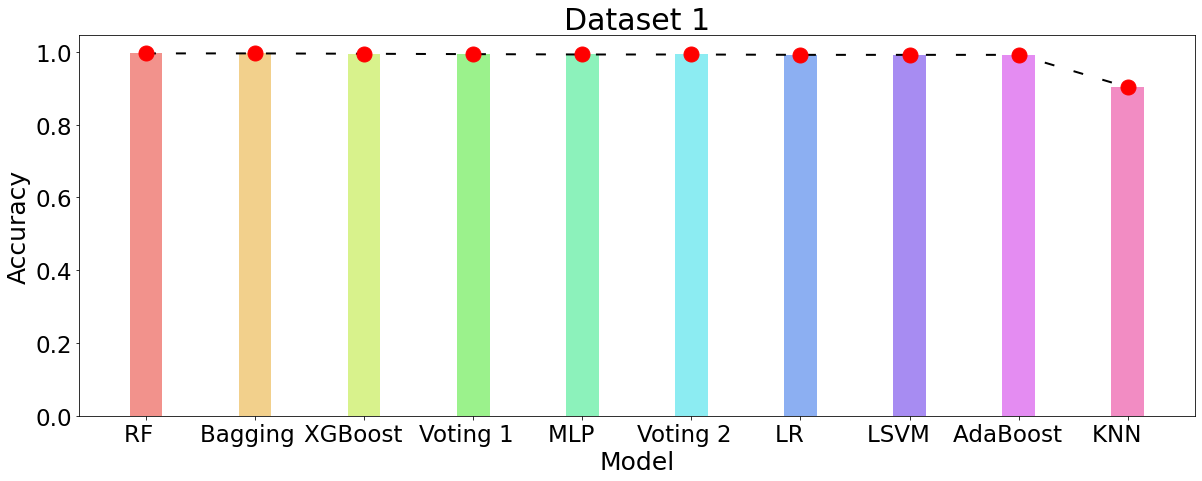

In [18]:
plt.figure(figsize=(20,7))
plt.bar(x=DS1_Best_Accuracy_df.index.map(lambda x : x.split("(")[0]),height=DS1_Best_Accuracy_df['Accuracy'],width=0.3,color=sns.hls_palette(10 , l = .75, s = .8))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.title('Dataset 1',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
x=plt.gca().xaxis.get_ticklocs() 
y=DS1_Best_Accuracy_df['Accuracy']
plt.plot(x,y,linestyle = (0,(5,10)),linewidth = 2, marker='o',color='black',
                                            markersize = 15, markeredgecolor='r', 
                                            markerfacecolor='r')
plt.show()

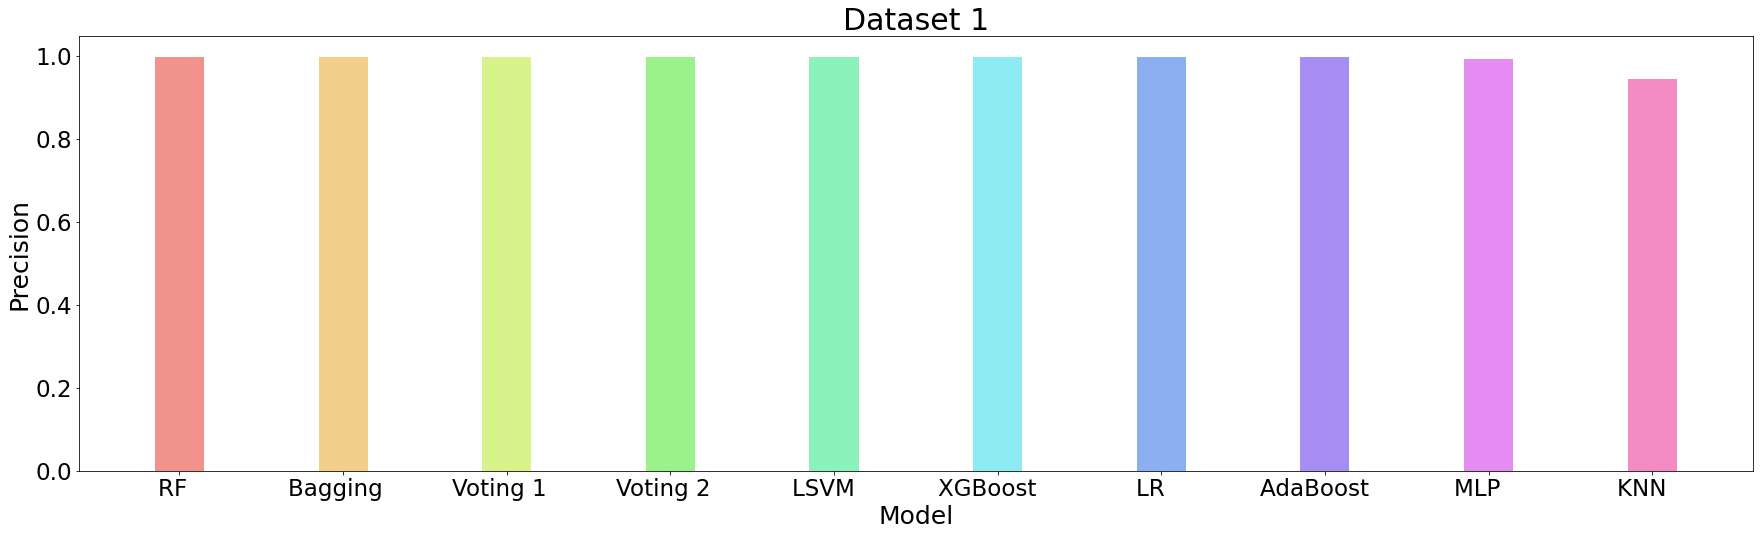

In [19]:
plt.figure(figsize=(30,8))
plt.bar(x=DS1_Best_Precision_df.index.map(lambda x : x.split("(")[0]),height=DS1_Best_Precision_df['Precision'],width=0.3,color=sns.hls_palette(10 , l = .75, s = .8))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Precision',fontsize=25)
plt.title('Dataset 1',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()

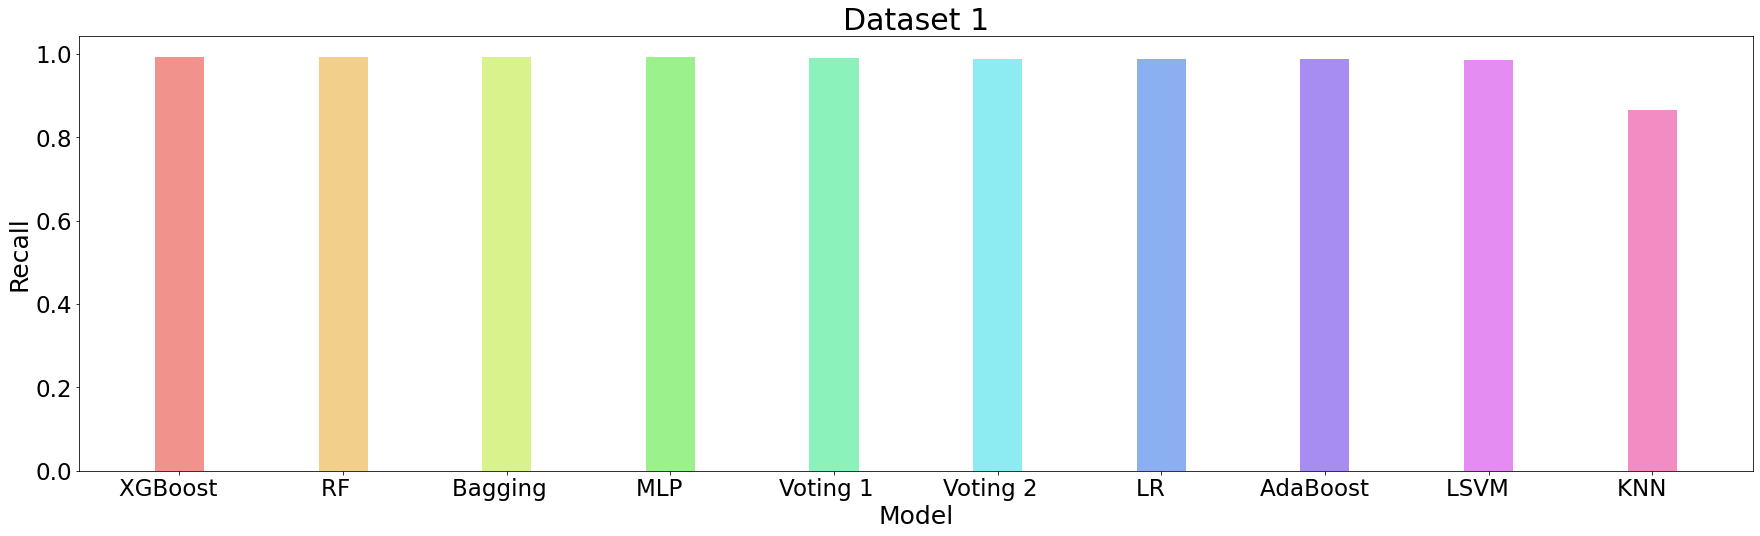

In [20]:
plt.figure(figsize=(30,8))
plt.bar(x=DS1_Best_Recall_df.index.map(lambda x : x.split("(")[0]),height=DS1_Best_Recall_df['Recall'],width=0.3,color=sns.hls_palette(10 , l = .75, s = .8))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Recall',fontsize=25)
plt.title('Dataset 1',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()

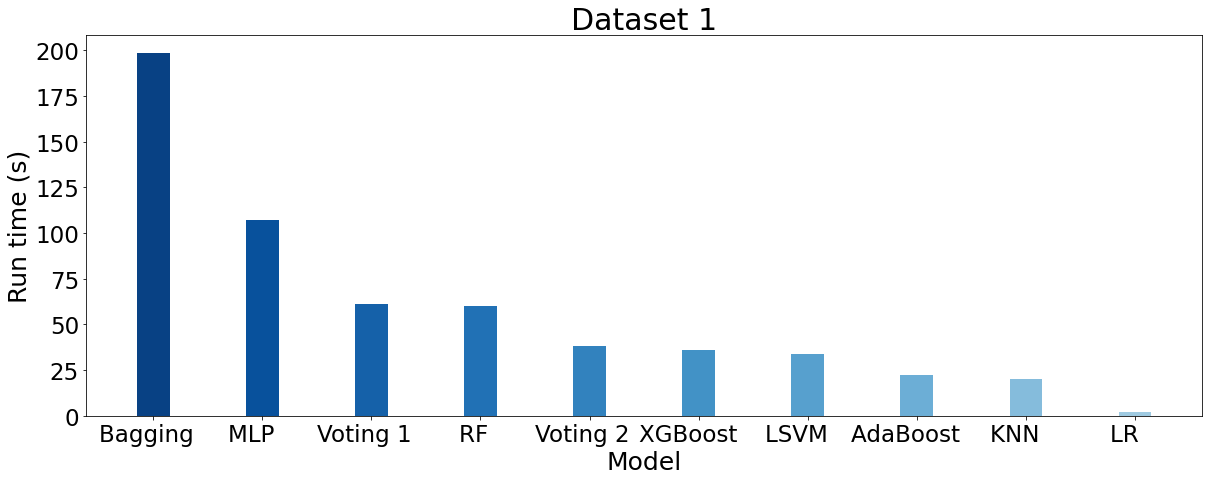

In [22]:
plt.figure(figsize=(20,7))
plt.bar(x=DS1_Best_Accuracy_df.sort_values(by='Run time (s)',ascending=False).index.map(lambda x : x.split("(")[0]),height=DS1_Best_Accuracy_df.sort_values(by='Run time (s)',ascending=False)['Run time (s)'],width=0.3,color=sns.color_palette('Blues_r',15))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Run time (s)',fontsize=25)
plt.title('Dataset 1',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()

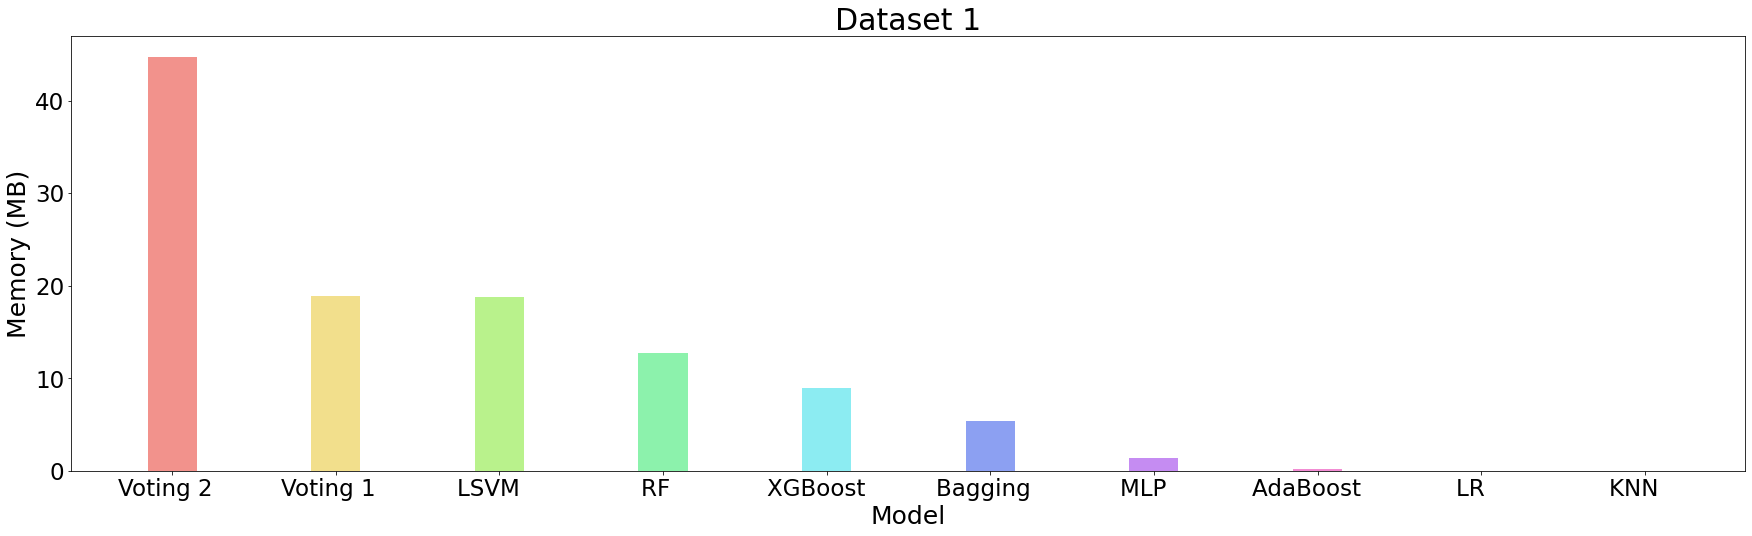

In [23]:
plt.figure(figsize=(30,8))
plt.bar(x=DS1_Best_Accuracy_df.sort_values(by='Memory (MB)',ascending=False).index.map(lambda x : x.split("(")[0]),height=DS1_Best_Accuracy_df.sort_values(by='Memory (MB)',ascending=False)['Memory (MB)'],width=0.3,color=sns.hls_palette(8 , l = .75, s = .8))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Memory (MB)',fontsize=25)
plt.title('Dataset 1',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()

## 7.2 Dataset 2

In [24]:
DS2_LR_df    = pd.read_csv('DS2_LR_df')
DS2_LSVM_df  = pd.read_csv('DS2_LSVM_df')
DS2_MLP_df   = pd.read_csv('DS2_MLP_df')
DS2_KNN_df   = pd.read_csv('DS2_KNN_df')
DS2_RF_df    = pd.read_csv('DS2_RF_df')
DS2_VOT_1_df = pd.read_csv('DS2_VOT_1_df')
DS2_VOT_2_df = pd.read_csv('DS2_VOT_2_df')
DS2_BAGG_df  = pd.read_csv('DS2_BAGG_df')
DS2_ADA_df   = pd.read_csv('DS2_ADA_df')
DS2_XG_df    = pd.read_csv('DS2_XG_df')

In [25]:
DS2_LR_df.index = list(DS2_LR_df["Unnamed: 0"])
DS2_LR_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS2_LSVM_df.index = list(DS2_LSVM_df["Unnamed: 0"])
DS2_LSVM_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS2_MLP_df.index = list(DS2_MLP_df["Unnamed: 0"])
DS2_MLP_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS2_KNN_df.index = list(DS2_KNN_df["Unnamed: 0"])
DS2_KNN_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS2_RF_df.index = list(DS2_RF_df["Unnamed: 0"])
DS2_RF_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS2_VOT_1_df.index = list(DS2_VOT_1_df["Unnamed: 0"])
DS2_VOT_1_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS2_VOT_2_df.index = list(DS2_VOT_2_df["Unnamed: 0"])
DS2_VOT_2_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS2_BAGG_df.index = list(DS2_BAGG_df["Unnamed: 0"])
DS2_BAGG_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS2_ADA_df.index = list(DS2_ADA_df["Unnamed: 0"])
DS2_ADA_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS2_XG_df.index = list(DS2_XG_df["Unnamed: 0"])
DS2_XG_df.drop('Unnamed: 0',axis = 1,inplace = True)

In [26]:
DS2_LR_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
LR (BoW) (n=1),0.770,0.715,0.883,0.790,1.069,44.492
LR (BoW) (n=2),0.812,0.761,0.899,0.824,0.868,4.152
LR (BoW) (n=3),0.817,0.762,0.909,0.829,1.180,4.168
LR (TF-IDF) (n=1),0.779,0.756,0.809,0.782,0.683,4.305
LR (TF-IDF) (n=2),0.806,0.783,0.833,0.807,0.851,5.406
LR (TF-IDF) (n=3),0.810,0.765,0.881,0.819,1.301,5.410


In [27]:
DS2_LSVM_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
LSVM (BoW) (n=1),0.763,0.716,0.856,0.780,24.996,0.008
LSVM (BoW) (n=2),0.809,0.753,0.906,0.823,9.592,0.004
LSVM (BoW) (n=3),0.817,0.761,0.912,0.829,7.034,0.000
LSVM (TF-IDF) (n=1),0.778,0.754,0.809,0.781,2.023,0.000
LSVM (TF-IDF) (n=2),0.805,0.782,0.834,0.807,0.980,0.000
LSVM (TF-IDF) (n=3),0.809,0.765,0.880,0.819,0.736,0.000


In [28]:
DS2_MLP_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
MLP (BoW) (n=1),0.777,0.761,0.793,0.777,68.327,1.480
MLP (BoW) (n=2),0.804,0.781,0.834,0.807,65.313,0.059
MLP (BoW) (n=3),0.820,0.764,0.913,0.832,61.109,9.676
MLP (TF-IDF) (n=1),0.795,0.777,0.814,0.795,67.315,17.449
MLP (TF-IDF) (n=2),0.817,0.782,0.869,0.823,70.946,0.043
MLP (TF-IDF) (n=3),0.818,0.761,0.917,0.832,63.826,0.020


In [29]:
DS2_KNN_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
KNN (BoW) (n=1),0.770,0.742,0.812,0.775,7.568,5.613
KNN (BoW) (n=2),0.797,0.763,0.850,0.804,6.524,0.012
KNN (BoW) (n=3),0.607,0.805,0.258,0.391,6.274,0.008
KNN (TF-IDF) (n=1),0.755,0.769,0.713,0.740,7.581,0.004
KNN (TF-IDF) (n=2),0.790,0.761,0.832,0.795,7.103,0.008
KNN (TF-IDF) (n=3),0.604,0.792,0.259,0.390,6.548,0.004


In [30]:
DS2_RF_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
RF (BoW) (n=1),0.804,0.772,0.851,0.810,31.202,45.062
RF (BoW) (n=2),0.811,0.779,0.858,0.817,22.363,3.352
RF (BoW) (n=3),0.820,0.766,0.910,0.832,21.802,132.598
RF (TF-IDF) (n=1),0.803,0.771,0.851,0.809,65.302,37.090
RF (TF-IDF) (n=2),0.819,0.783,0.874,0.826,35.410,13.285
RF (TF-IDF) (n=3),0.820,0.766,0.909,0.831,24.688,35.168


In [31]:
DS2_VOT_1_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
Voting 1 (BoW) (n=1),0.798,0.752,0.876,0.809,40.744,73.594
Voting 1 (BoW) (n=2),0.817,0.776,0.879,0.824,28.884,11.105
Voting 1 (BoW) (n=3),0.820,0.766,0.910,0.832,30.280,49.098
Voting 1 (TF-IDF) (n=1),0.797,0.774,0.825,0.799,62.759,21.434
Voting 1 (TF-IDF) (n=2),0.816,0.784,0.860,0.820,37.997,1.520
Voting 1 (TF-IDF) (n=3),0.816,0.767,0.897,0.827,33.673,47.176


In [32]:
DS2_VOT_2_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
Voting 2 (BoW) (n=1),0.775,0.727,0.864,0.789,24.852,20.781
Voting 2 (BoW) (n=2),0.812,0.760,0.900,0.824,11.262,23.793
Voting 2 (BoW) (n=3),0.817,0.762,0.910,0.830,8.966,25.797
Voting 2 (TF-IDF) (n=1),0.779,0.756,0.811,0.782,8.884,24.238
Voting 2 (TF-IDF) (n=2),0.805,0.782,0.834,0.807,5.186,24.297
Voting 2 (TF-IDF) (n=3),0.810,0.765,0.882,0.819,4.025,24.223


In [33]:
DS2_BAGG_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
Bagging (BoW) (n=1),0.809,0.781,0.846,0.812,146.366,24.344
Bagging (BoW) (n=2),0.805,0.773,0.852,0.810,77.401,1.168
Bagging (BoW) (n=3),0.818,0.764,0.908,0.830,62.504,32.375
Bagging (TF-IDF) (n=1),0.805,0.771,0.856,0.811,425.302,22.629
Bagging (TF-IDF) (n=2),0.817,0.780,0.872,0.824,190.556,2.105
Bagging (TF-IDF) (n=3),0.820,0.766,0.910,0.832,81.175,3.770


In [34]:
DS2_ADA_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
AdaBoost (BoW) (n=1),0.782,0.750,0.831,0.788,13.682,0.355
AdaBoost (BoW) (n=2),0.814,0.766,0.893,0.824,9.017,0.012
AdaBoost (BoW) (n=3),0.816,0.762,0.906,0.828,7.993,0.004
AdaBoost (TF-IDF) (n=1),0.777,0.756,0.805,0.780,27.336,0.000
AdaBoost (TF-IDF) (n=2),0.812,0.775,0.868,0.819,10.914,20.590
AdaBoost (TF-IDF) (n=3),0.818,0.765,0.907,0.830,7.679,0.004


In [35]:
DS2_XG_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
XGBoost (BoW) (n=1),0.804,0.777,0.839,0.807,15.792,16.738
XGBoost (BoW) (n=2),0.821,0.782,0.879,0.828,14.912,0.895
XGBoost (BoW) (n=3),0.819,0.766,0.907,0.831,13.550,0.398
XGBoost (TF-IDF) (n=1),0.802,0.778,0.832,0.804,43.450,0.340
XGBoost (TF-IDF) (n=2),0.821,0.781,0.881,0.828,21.190,0.223
XGBoost (TF-IDF) (n=3),0.821,0.767,0.910,0.833,14.558,0.320


In [36]:
DS2_res_df = pd.concat([DS2_LR_df, DS2_LSVM_df, DS2_MLP_df, DS2_KNN_df, DS2_RF_df, DS2_VOT_1_df, DS2_VOT_2_df, DS2_BAGG_df, DS2_ADA_df, DS2_XG_df]).sort_values(by=['Accuracy','F1-score'],ascending=False)
DS2_res_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
XGBoost (TF-IDF) (n=3),0.821,0.767,0.910,0.833,14.558,0.320
XGBoost (BoW) (n=2),0.821,0.782,0.879,0.828,14.912,0.895
XGBoost (TF-IDF) (n=2),0.821,0.781,0.881,0.828,21.190,0.223
MLP (BoW) (n=3),0.820,0.764,0.913,0.832,61.109,9.676
RF (BoW) (n=3),0.820,0.766,0.910,0.832,21.802,132.598
Voting 1 (BoW) (n=3),0.820,0.766,0.910,0.832,30.280,49.098
Bagging (TF-IDF) (n=3),0.820,0.766,0.910,0.832,81.175,3.770
RF (TF-IDF) (n=3),0.820,0.766,0.909,0.831,24.688,35.168
XGBoost (BoW) (n=3),0.819,0.766,0.907,0.831,13.550,0.398
RF (TF-IDF) (n=2),0.819,0.783,0.874,0.826,35.410,13.285


In [37]:
DS2_res_df['LM'] = DS2_res_df.index.map(lambda x : x.split('(')[1][:-2])
DS2_res_df['N']  = DS2_res_df.index.map(lambda x : x[-2:-1])
DS2_res_df['ML'] = DS2_res_df.index.map(lambda x : x.split('(')[0][:].strip())
DS2_res_df['DS'] = '2'

In [38]:
DS2_res_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB),LM,N,ML,DS
XGBoost (TF-IDF) (n=3),0.821,0.767,0.910,0.833,14.558,0.320,TF-IDF,3,XGBoost,2
XGBoost (BoW) (n=2),0.821,0.782,0.879,0.828,14.912,0.895,BoW,2,XGBoost,2
XGBoost (TF-IDF) (n=2),0.821,0.781,0.881,0.828,21.190,0.223,TF-IDF,2,XGBoost,2
MLP (BoW) (n=3),0.820,0.764,0.913,0.832,61.109,9.676,BoW,3,MLP,2
RF (BoW) (n=3),0.820,0.766,0.910,0.832,21.802,132.598,BoW,3,RF,2
Voting 1 (BoW) (n=3),0.820,0.766,0.910,0.832,30.280,49.098,BoW,3,Voting 1,2
Bagging (TF-IDF) (n=3),0.820,0.766,0.910,0.832,81.175,3.770,TF-IDF,3,Bagging,2
RF (TF-IDF) (n=3),0.820,0.766,0.909,0.831,24.688,35.168,TF-IDF,3,RF,2
XGBoost (BoW) (n=3),0.819,0.766,0.907,0.831,13.550,0.398,BoW,3,XGBoost,2
RF (TF-IDF) (n=2),0.819,0.783,0.874,0.826,35.410,13.285,TF-IDF,2,RF,2


In [93]:
DS2_Best_Accuracy_df = pd.concat([DS2_LR_df[:1].sort_values(by=['Accuracy'],ascending=False), DS2_LSVM_df.sort_values(by=['Accuracy'],ascending=False)[:1],
                         DS2_MLP_df.sort_values(by=['Accuracy'],ascending=False)[:1], DS2_KNN_df.sort_values(by=['Accuracy'],ascending=False)[:1], 
                         DS2_RF_df.sort_values(by=['Accuracy'],ascending=False)[:1], DS2_VOT_1_df.sort_values(by=['Accuracy'],ascending=False)[:1], 
                         DS2_VOT_2_df.sort_values(by=['Accuracy'],ascending=False)[:1], DS2_BAGG_df.sort_values(by=['Accuracy'],ascending=False)[:1], 
                         DS2_ADA_df.sort_values(by=['Accuracy'],ascending=False)[:1], DS2_XG_df.sort_values(by=['Accuracy'],ascending=False)[:1]]).sort_values(by=['Accuracy'],ascending=False)
DS2_Best_Accuracy_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
XGBoost (BoW) (n=2),0.821,0.782,0.879,0.828,14.912,0.895
MLP (BoW) (n=3),0.820,0.764,0.913,0.832,61.109,9.676
RF (BoW) (n=3),0.820,0.766,0.910,0.832,21.802,132.598
Voting 1 (BoW) (n=3),0.820,0.766,0.910,0.832,30.280,49.098
Bagging (TF-IDF) (n=3),0.820,0.766,0.910,0.832,81.175,3.770
AdaBoost (TF-IDF) (n=3),0.818,0.765,0.907,0.830,7.679,0.004
LSVM (BoW) (n=3),0.817,0.761,0.912,0.829,7.034,0.000
Voting 2 (BoW) (n=3),0.817,0.762,0.910,0.830,8.966,25.797
KNN (BoW) (n=2),0.797,0.763,0.850,0.804,6.524,0.012
LR (BoW) (n=1),0.770,0.715,0.883,0.790,1.069,44.492


In [90]:
DS2_Best_Precision_df = pd.concat([DS2_LR_df[:1].sort_values(by=['Precision'],ascending=False), DS2_LSVM_df.sort_values(by=['Precision'],ascending=False)[:1],
                         DS2_MLP_df.sort_values(by=['Precision'],ascending=False)[:1], DS2_KNN_df.sort_values(by=['Precision'],ascending=False)[:1], 
                         DS2_RF_df.sort_values(by=['Precision'],ascending=False)[:1], DS2_VOT_1_df.sort_values(by=['Precision'],ascending=False)[:1], 
                         DS2_VOT_2_df.sort_values(by=['Precision'],ascending=False)[:1], DS2_BAGG_df.sort_values(by=['Precision'],ascending=False)[:1], 
                         DS2_ADA_df.sort_values(by=['Precision'],ascending=False)[:1], DS2_XG_df.sort_values(by=['Precision'],ascending=False)[:1]]).sort_values(by=['Precision'],ascending=False)
DS2_Best_Precision_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
KNN (BoW) (n=3),0.607,0.805,0.258,0.391,6.274,0.008
Voting 1 (TF-IDF) (n=2),0.816,0.784,0.860,0.820,37.997,1.520
RF (TF-IDF) (n=2),0.819,0.783,0.874,0.826,35.410,13.285
LSVM (TF-IDF) (n=2),0.805,0.782,0.834,0.807,0.980,0.000
MLP (TF-IDF) (n=2),0.817,0.782,0.869,0.823,70.946,0.043
Voting 2 (TF-IDF) (n=2),0.805,0.782,0.834,0.807,5.186,24.297
XGBoost (BoW) (n=2),0.821,0.782,0.879,0.828,14.912,0.895
Bagging (BoW) (n=1),0.809,0.781,0.846,0.812,146.366,24.344
AdaBoost (TF-IDF) (n=2),0.812,0.775,0.868,0.819,10.914,20.590
LR (BoW) (n=1),0.770,0.715,0.883,0.790,1.069,44.492


In [87]:
DS2_Best_Recall_df = pd.concat([DS2_LR_df[:1].sort_values(by=['Recall'],ascending=False), DS2_LSVM_df.sort_values(by=['Recall'],ascending=False)[:1],
                         DS2_MLP_df.sort_values(by=['Recall'],ascending=False)[:1], DS2_KNN_df.sort_values(by=['Recall'],ascending=False)[:1], 
                         DS2_RF_df.sort_values(by=['Recall'],ascending=False)[:1], DS2_VOT_1_df.sort_values(by=['Recall'],ascending=False)[:1], 
                         DS2_VOT_2_df.sort_values(by=['Recall'],ascending=False)[:1], DS2_BAGG_df.sort_values(by=['Recall'],ascending=False)[:1], 
                         DS2_ADA_df.sort_values(by=['Recall'],ascending=False)[:1], DS2_XG_df.sort_values(by=['Recall'],ascending=False)[:1]]).sort_values(by=['Recall'],ascending=False)
DS2_Best_Recall_df


,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
MLP (TF-IDF) (n=3),0.818,0.761,0.917,0.832,63.826,0.020
LSVM (BoW) (n=3),0.817,0.761,0.912,0.829,7.034,0.000
RF (BoW) (n=3),0.820,0.766,0.910,0.832,21.802,132.598
Voting 1 (BoW) (n=3),0.820,0.766,0.910,0.832,30.280,49.098
Voting 2 (BoW) (n=3),0.817,0.762,0.910,0.830,8.966,25.797
Bagging (TF-IDF) (n=3),0.820,0.766,0.910,0.832,81.175,3.770
XGBoost (TF-IDF) (n=3),0.821,0.767,0.910,0.833,14.558,0.320
AdaBoost (TF-IDF) (n=3),0.818,0.765,0.907,0.830,7.679,0.004
LR (BoW) (n=1),0.770,0.715,0.883,0.790,1.069,44.492
KNN (BoW) (n=2),0.797,0.763,0.850,0.804,6.524,0.012


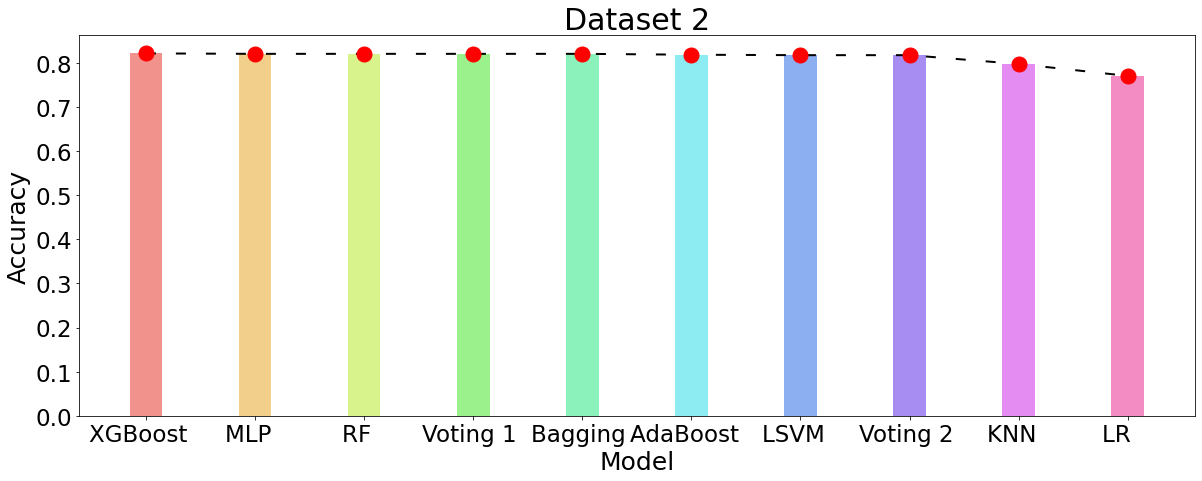

In [40]:
plt.figure(figsize=(20,7))
plt.bar(x=DS2_Best_Accuracy_df.index.map(lambda x : x.split("(")[0]),height=DS2_Best_Accuracy_df['Accuracy'],width=0.3,label='Accuracy',color=sns.hls_palette(10 , l = .75, s = .8))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.title('Dataset 2',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
x=plt.gca().xaxis.get_ticklocs() 
y=DS2_Best_Accuracy_df['Accuracy']
plt.plot(x,y,linestyle = (0,(5,10)),linewidth = 2, marker='o',color='black',
                                            markersize = 15, markeredgecolor='r', 
                                            markerfacecolor='r')
plt.show()

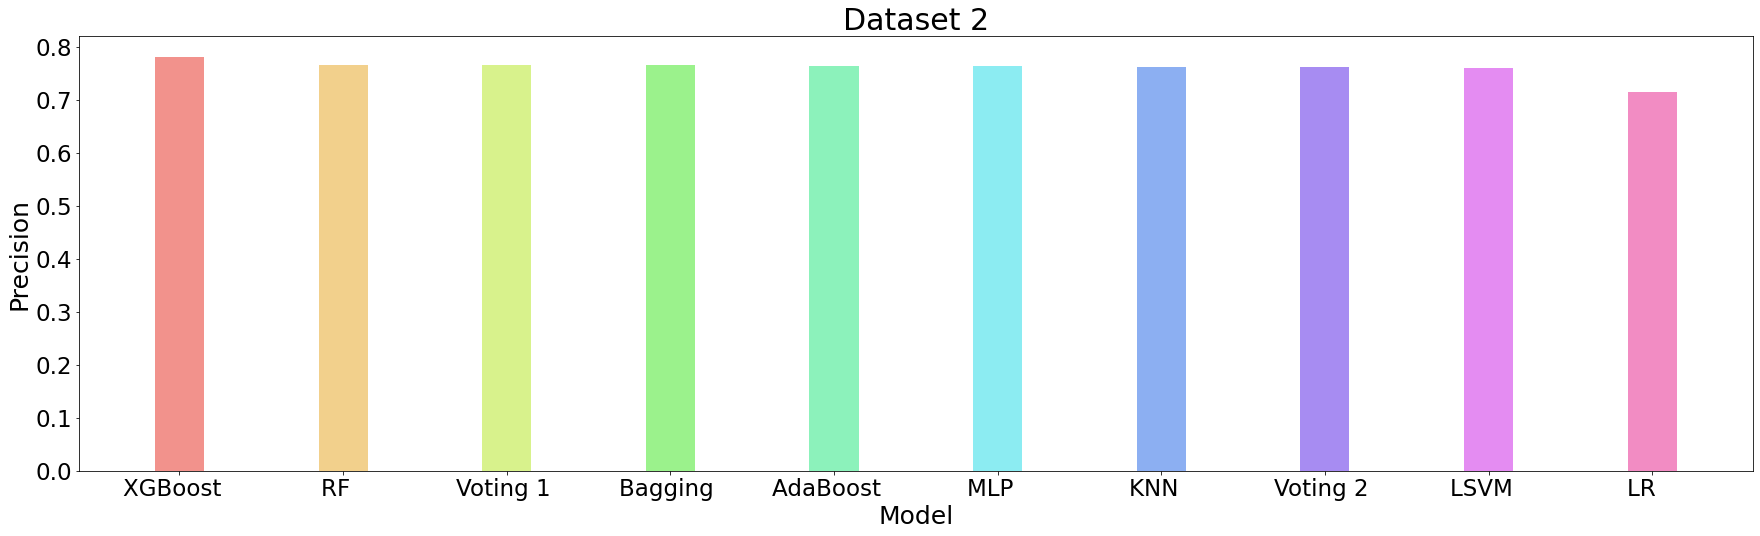

In [41]:
plt.figure(figsize=(30,8))
plt.bar(x=DS2_Best_Precision_df.index.map(lambda x : x.split("(")[0]),height=DS2_Best_Precision_df['Precision'],width=0.3,label='Precision',color=sns.hls_palette(10 , l = .75, s = .8))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Precision',fontsize=25)
plt.title('Dataset 2',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()

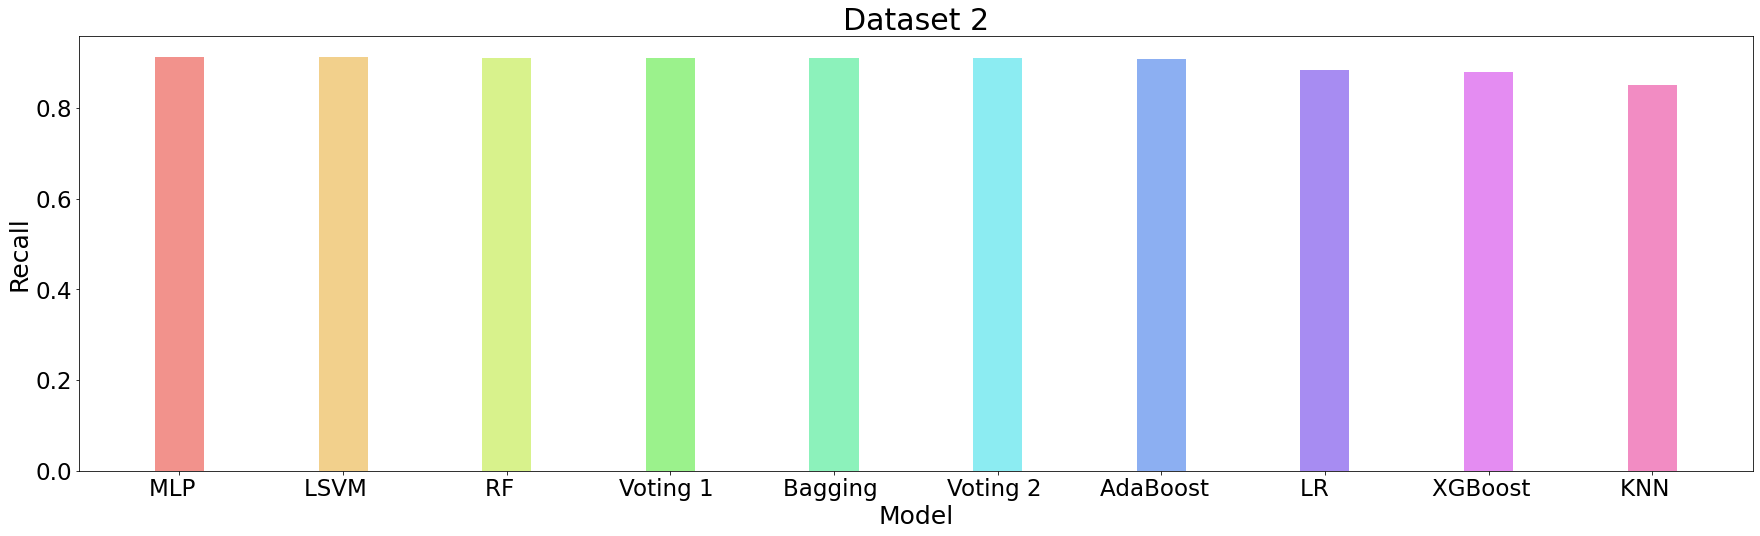

In [42]:
plt.figure(figsize=(30,8))
plt.bar(x=DS2_Best_Recall_df.index.map(lambda x : x.split("(")[0]),height=DS2_Best_Recall_df['Recall'],width=0.3,label='Recall',color=sns.hls_palette(10 , l = .75, s = .8))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Recall',fontsize=25)
plt.title('Dataset 2',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()

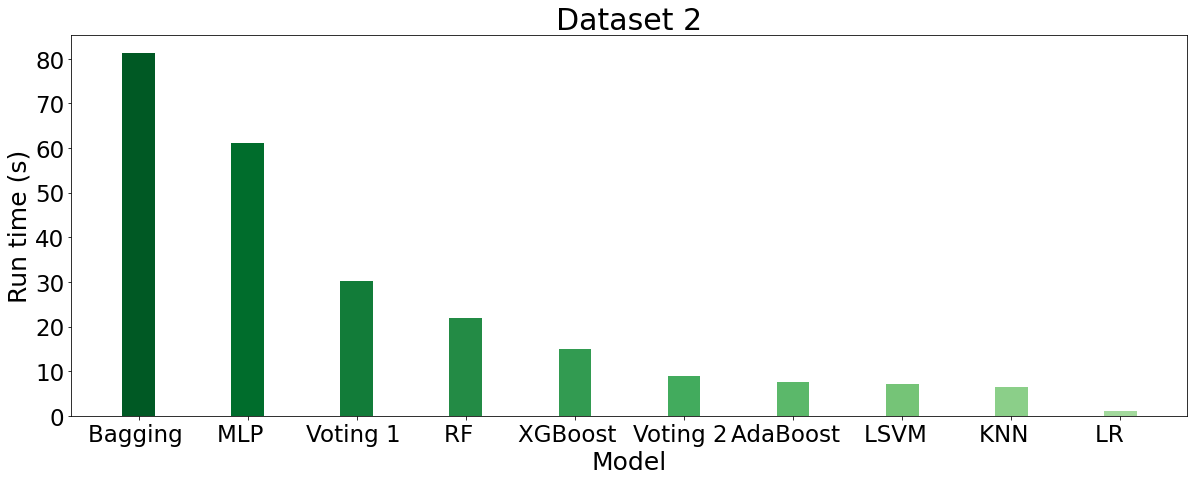

In [44]:
plt.figure(figsize=(20,7))
plt.bar(x=DS2_Best_Accuracy_df.sort_values(by='Run time (s)',ascending=False).index.map(lambda x : x.split("(")[0]),height=DS2_Best_Accuracy_df.sort_values(by='Run time (s)',ascending=False)['Run time (s)'],width=0.3,label='Run time (s)',color=sns.color_palette('Greens_r',15))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Run time (s)',fontsize=25)
plt.title('Dataset 2',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()

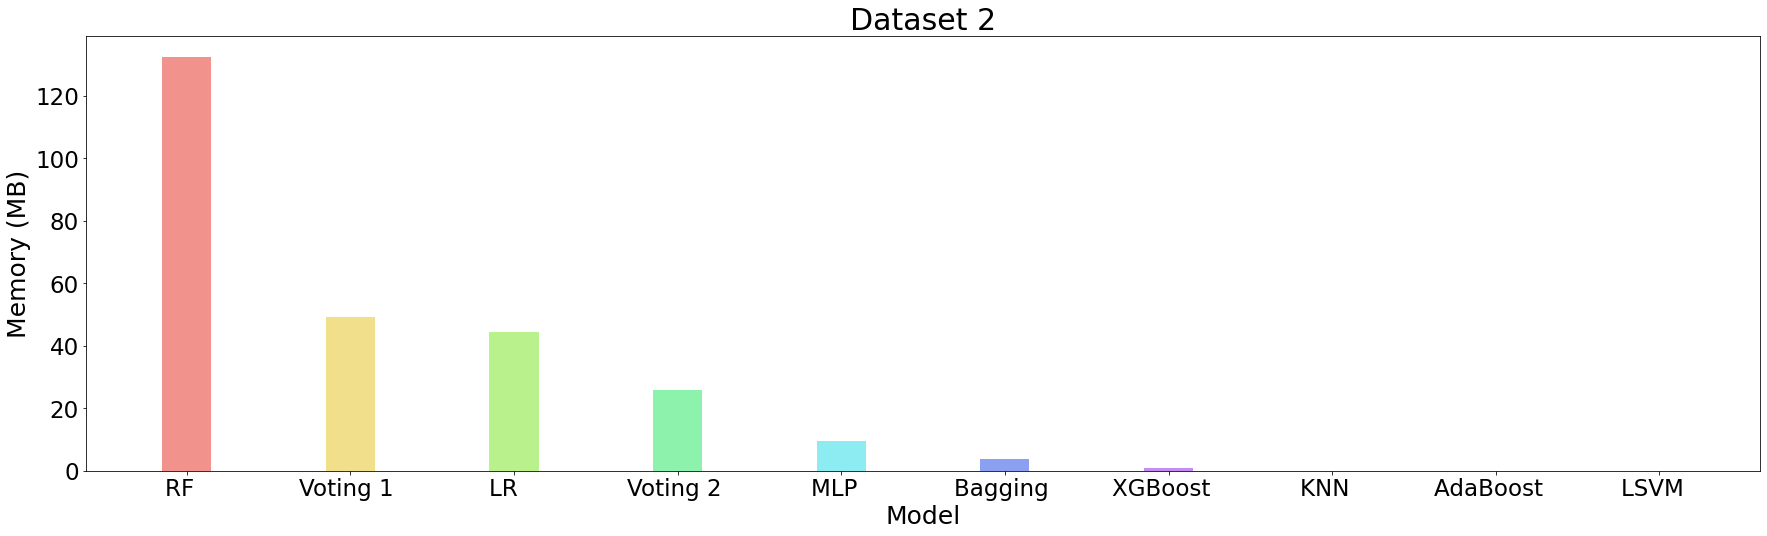

In [45]:
plt.figure(figsize=(30,8))
plt.bar(x=DS2_Best_Accuracy_df.sort_values(by='Memory (MB)',ascending=False).index.map(lambda x : x.split("(")[0]),height=DS2_Best_Accuracy_df.sort_values(by='Memory (MB)',ascending=False)['Memory (MB)'],width=0.3,label='Memory (MB)',color=sns.hls_palette(8 , l = .75, s = .8))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Memory (MB)',fontsize=25)
plt.title('Dataset 2',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()

## 7.3 Dataset 3

In [46]:
DS3_LR_df    = pd.read_csv('DS3_LR_df')
DS3_LSVM_df  = pd.read_csv('DS3_LSVM_df')
DS3_MLP_df   = pd.read_csv('DS3_MLP_df')
DS3_KNN_df   = pd.read_csv('DS3_KNN_df')
DS3_RF_df    = pd.read_csv('DS3_RF_df')
DS3_VOT_1_df = pd.read_csv('DS3_VOT_1_df')
DS3_VOT_2_df = pd.read_csv('DS3_VOT_2_df')
DS3_BAGG_df  = pd.read_csv('DS3_BAGG_df')
DS3_ADA_df   = pd.read_csv('DS3_ADA_df')
DS3_XG_df    = pd.read_csv('DS3_XG_df')

In [47]:
DS3_LR_df.index = list(DS3_LR_df["Unnamed: 0"])
DS3_LR_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS3_LSVM_df.index = list(DS3_LSVM_df["Unnamed: 0"])
DS3_LSVM_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS3_MLP_df.index = list(DS3_MLP_df["Unnamed: 0"])
DS3_MLP_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS3_KNN_df.index = list(DS3_KNN_df["Unnamed: 0"])
DS3_KNN_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS3_RF_df.index = list(DS3_RF_df["Unnamed: 0"])
DS3_RF_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS3_VOT_1_df.index = list(DS3_VOT_1_df["Unnamed: 0"])
DS3_VOT_1_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS3_VOT_2_df.index = list(DS3_VOT_2_df["Unnamed: 0"])
DS3_VOT_2_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS3_BAGG_df.index = list(DS3_BAGG_df["Unnamed: 0"])
DS3_BAGG_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS3_ADA_df.index = list(DS3_ADA_df["Unnamed: 0"])
DS3_ADA_df.drop('Unnamed: 0',axis = 1,inplace = True)

DS3_XG_df.index = list(DS3_XG_df["Unnamed: 0"])
DS3_XG_df.drop('Unnamed: 0',axis = 1,inplace = True)

In [48]:
DS3_LR_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
LR (BoW) (n=1),0.86,0.83,0.93,0.88,0.73,7.69
LR (BoW) (n=2),0.82,0.78,0.91,0.84,1.00,3.84
LR (BoW) (n=3),0.70,1.00,0.44,0.61,0.42,2.30
LR (TF-IDF) (n=1),0.85,0.87,0.86,0.86,0.35,0.00
LR (TF-IDF) (n=2),0.81,0.78,0.90,0.83,0.55,0.00
LR (TF-IDF) (n=3),0.70,1.00,0.44,0.61,0.44,0.00


In [49]:
DS3_LSVM_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
LSVM (BoW) (n=1),0.86,0.83,0.94,0.88,2.51,0.00
LSVM (BoW) (n=2),0.82,0.78,0.93,0.85,1.17,0.01
LSVM (BoW) (n=3),0.70,1.00,0.44,0.61,1.36,0.00
LSVM (TF-IDF) (n=1),0.86,0.88,0.85,0.87,0.28,0.00
LSVM (TF-IDF) (n=2),0.81,0.78,0.90,0.83,0.16,0.00
LSVM (TF-IDF) (n=3),0.70,1.00,0.44,0.61,0.16,0.00


In [50]:
DS3_MLP_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
MLP (BoW) (n=1),0.92,0.90,0.95,0.93,22.10,0.54
MLP (BoW) (n=2),0.82,0.77,0.95,0.85,20.74,0.00
MLP (BoW) (n=3),0.70,1.00,0.44,0.61,18.14,0.00
MLP (TF-IDF) (n=1),0.91,0.91,0.93,0.92,23.54,0.00
MLP (TF-IDF) (n=2),0.83,0.80,0.91,0.85,22.38,0.00
MLP (TF-IDF) (n=3),0.70,1.00,0.44,0.61,14.41,0.00


In [51]:
DS3_KNN_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
KNN (BoW) (n=1),0.87,0.87,0.89,0.88,0.67,1.82
KNN (BoW) (n=2),0.73,0.89,0.57,0.69,0.77,0.00
KNN (BoW) (n=3),0.70,1.00,0.44,0.61,0.73,0.00
KNN (TF-IDF) (n=1),0.88,0.87,0.90,0.89,0.88,0.00
KNN (TF-IDF) (n=2),0.73,0.88,0.57,0.69,0.74,0.00
KNN (TF-IDF) (n=3),0.70,1.00,0.44,0.61,0.75,0.00


In [52]:
DS3_RF_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
RF (BoW) (n=1),0.92,0.93,0.92,0.92,9.14,0.20
RF (BoW) (n=2),0.84,0.79,0.95,0.86,6.09,0.05
RF (BoW) (n=3),0.70,1.00,0.44,0.61,4.87,0.00
RF (TF-IDF) (n=1),0.92,0.93,0.92,0.92,12.39,0.18
RF (TF-IDF) (n=2),0.84,0.80,0.94,0.86,6.90,0.09
RF (TF-IDF) (n=3),0.70,1.00,0.44,0.61,4.86,0.00


In [53]:
DS3_VOT_1_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
Voting 1 (BoW) (n=1),0.91,0.90,0.93,0.91,11.58,0.01
Voting 1 (BoW) (n=2),0.81,0.77,0.92,0.84,10.42,0.01
Voting 1 (BoW) (n=3),0.70,1.00,0.44,0.61,8.05,0.00
Voting 1 (TF-IDF) (n=1),0.91,0.91,0.92,0.91,16.36,0.01
Voting 1 (TF-IDF) (n=2),0.82,0.79,0.90,0.84,9.74,0.03
Voting 1 (TF-IDF) (n=3),0.70,1.00,0.44,0.61,9.04,0.00


In [54]:
DS3_VOT_2_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
Voting 2 (BoW) (n=1),0.86,0.83,0.93,0.88,4.66,0.0
Voting 2 (BoW) (n=2),0.83,0.79,0.93,0.85,3.19,0.0
Voting 2 (BoW) (n=3),0.70,1.00,0.44,0.61,2.53,0.0
Voting 2 (TF-IDF) (n=1),0.86,0.88,0.86,0.87,2.56,0.0
Voting 2 (TF-IDF) (n=2),0.81,0.78,0.90,0.83,1.29,0.0
Voting 2 (TF-IDF) (n=3),0.70,1.00,0.44,0.61,0.96,0.0


In [55]:
DS3_BAGG_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
Bagging (BoW) (n=1),0.92,0.92,0.93,0.92,32.45,0.07
Bagging (BoW) (n=2),0.84,0.79,0.95,0.86,16.06,0.09
Bagging (BoW) (n=3),0.70,1.00,0.44,0.61,9.89,0.00
Bagging (TF-IDF) (n=1),0.91,0.93,0.91,0.92,78.75,0.00
Bagging (TF-IDF) (n=2),0.84,0.80,0.93,0.86,18.44,0.00
Bagging (TF-IDF) (n=3),0.70,1.00,0.44,0.61,9.68,0.00


In [56]:
DS3_ADA_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
AdaBoost (BoW) (n=1),0.89,0.87,0.93,0.90,6.39,0.0
AdaBoost (BoW) (n=2),0.82,0.78,0.94,0.85,4.43,0.0
AdaBoost (BoW) (n=3),0.70,1.00,0.44,0.61,4.26,0.0
AdaBoost (TF-IDF) (n=1),0.88,0.88,0.91,0.89,9.84,0.0
AdaBoost (TF-IDF) (n=2),0.82,0.78,0.93,0.85,5.05,0.0
AdaBoost (TF-IDF) (n=3),0.70,1.00,0.44,0.61,4.19,0.0


In [57]:
DS3_XG_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
XGBoost (BoW) (n=1),0.93,0.93,0.95,0.94,5.87,0.12
XGBoost (BoW) (n=2),0.83,0.79,0.93,0.85,4.56,0.02
XGBoost (BoW) (n=3),0.70,1.00,0.44,0.61,3.64,0.00
XGBoost (TF-IDF) (n=1),0.92,0.92,0.94,0.93,8.78,0.02
XGBoost (TF-IDF) (n=2),0.84,0.80,0.94,0.86,4.91,0.00
XGBoost (TF-IDF) (n=3),0.70,1.00,0.44,0.61,3.16,0.01


In [58]:
DS3_res_df = pd.concat([DS3_LR_df, DS3_LSVM_df, DS3_MLP_df, DS3_KNN_df, DS3_RF_df, DS3_VOT_1_df, DS3_VOT_2_df, DS3_BAGG_df, DS3_ADA_df, DS3_XG_df]).sort_values(by=['Accuracy','F1-score'],ascending=False)
DS3_res_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
XGBoost (BoW) (n=1),0.93,0.93,0.95,0.94,5.87,0.12
MLP (BoW) (n=1),0.92,0.90,0.95,0.93,22.10,0.54
XGBoost (TF-IDF) (n=1),0.92,0.92,0.94,0.93,8.78,0.02
RF (BoW) (n=1),0.92,0.93,0.92,0.92,9.14,0.20
RF (TF-IDF) (n=1),0.92,0.93,0.92,0.92,12.39,0.18
Bagging (BoW) (n=1),0.92,0.92,0.93,0.92,32.45,0.07
MLP (TF-IDF) (n=1),0.91,0.91,0.93,0.92,23.54,0.00
Bagging (TF-IDF) (n=1),0.91,0.93,0.91,0.92,78.75,0.00
Voting 1 (BoW) (n=1),0.91,0.90,0.93,0.91,11.58,0.01
Voting 1 (TF-IDF) (n=1),0.91,0.91,0.92,0.91,16.36,0.01


In [59]:
DS3_res_df['LM'] = DS3_res_df.index.map(lambda x : x.split('(')[1][:-2])
DS3_res_df['N']  = DS3_res_df.index.map(lambda x : x[-2:-1])
DS3_res_df['ML'] = DS3_res_df.index.map(lambda x : x.split('(')[0][:].strip())
DS3_res_df['DS'] = '3'

In [60]:
DS3_res_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB),LM,N,ML,DS
XGBoost (BoW) (n=1),0.93,0.93,0.95,0.94,5.87,0.12,BoW,1,XGBoost,3
MLP (BoW) (n=1),0.92,0.90,0.95,0.93,22.10,0.54,BoW,1,MLP,3
XGBoost (TF-IDF) (n=1),0.92,0.92,0.94,0.93,8.78,0.02,TF-IDF,1,XGBoost,3
RF (BoW) (n=1),0.92,0.93,0.92,0.92,9.14,0.20,BoW,1,RF,3
RF (TF-IDF) (n=1),0.92,0.93,0.92,0.92,12.39,0.18,TF-IDF,1,RF,3
Bagging (BoW) (n=1),0.92,0.92,0.93,0.92,32.45,0.07,BoW,1,Bagging,3
MLP (TF-IDF) (n=1),0.91,0.91,0.93,0.92,23.54,0.00,TF-IDF,1,MLP,3
Bagging (TF-IDF) (n=1),0.91,0.93,0.91,0.92,78.75,0.00,TF-IDF,1,Bagging,3
Voting 1 (BoW) (n=1),0.91,0.90,0.93,0.91,11.58,0.01,BoW,1,Voting 1,3
Voting 1 (TF-IDF) (n=1),0.91,0.91,0.92,0.91,16.36,0.01,TF-IDF,1,Voting 1,3


In [94]:
DS3_Best_Accuracy_df = pd.concat([DS3_LR_df[:1].sort_values(by=['Accuracy'],ascending=False), DS3_LSVM_df.sort_values(by=['Accuracy'],ascending=False)[:1],
                         DS3_MLP_df.sort_values(by=['Accuracy'],ascending=False)[:1], DS3_KNN_df.sort_values(by=['Accuracy'],ascending=False)[:1], 
                         DS3_RF_df.sort_values(by=['Accuracy'],ascending=False)[:1], DS3_VOT_1_df.sort_values(by=['Accuracy'],ascending=False)[:1], 
                         DS3_VOT_2_df.sort_values(by=['Accuracy'],ascending=False)[:1], DS3_BAGG_df.sort_values(by=['Accuracy'],ascending=False)[:1], 
                         DS3_ADA_df.sort_values(by=['Accuracy'],ascending=False)[:1], DS3_XG_df.sort_values(by=['Accuracy'],ascending=False)[:1]]).sort_values(by=['Accuracy'],ascending=False)
DS3_Best_Accuracy_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
XGBoost (BoW) (n=1),0.93,0.93,0.95,0.94,5.87,0.12
MLP (BoW) (n=1),0.92,0.90,0.95,0.93,22.10,0.54
RF (BoW) (n=1),0.92,0.93,0.92,0.92,9.14,0.20
Bagging (BoW) (n=1),0.92,0.92,0.93,0.92,32.45,0.07
Voting 1 (BoW) (n=1),0.91,0.90,0.93,0.91,11.58,0.01
AdaBoost (BoW) (n=1),0.89,0.87,0.93,0.90,6.39,0.00
KNN (TF-IDF) (n=1),0.88,0.87,0.90,0.89,0.88,0.00
LR (BoW) (n=1),0.86,0.83,0.93,0.88,0.73,7.69
LSVM (BoW) (n=1),0.86,0.83,0.94,0.88,2.51,0.00
Voting 2 (BoW) (n=1),0.86,0.83,0.93,0.88,4.66,0.00


In [89]:
DS3_Best_Precision_df = pd.concat([DS3_LR_df[:1].sort_values(by=['Precision'],ascending=False), DS3_LSVM_df.sort_values(by=['Precision'],ascending=False)[:1],
                         DS3_MLP_df.sort_values(by=['Precision'],ascending=False)[:1], DS3_KNN_df.sort_values(by=['Precision'],ascending=False)[:1], 
                         DS3_RF_df.sort_values(by=['Precision'],ascending=False)[:1], DS3_VOT_1_df.sort_values(by=['Precision'],ascending=False)[:1], 
                         DS3_VOT_2_df.sort_values(by=['Precision'],ascending=False)[:1], DS3_BAGG_df.sort_values(by=['Precision'],ascending=False)[:1], 
                         DS3_ADA_df.sort_values(by=['Precision'],ascending=False)[:1], DS3_XG_df.sort_values(by=['Precision'],ascending=False)[:1]]).sort_values(by=['Precision'],ascending=False)
DS3_Best_Precision_df

,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
LSVM (BoW) (n=3),0.70,1.00,0.44,0.61,1.36,0.00
MLP (BoW) (n=3),0.70,1.00,0.44,0.61,18.14,0.00
KNN (BoW) (n=3),0.70,1.00,0.44,0.61,0.73,0.00
RF (BoW) (n=3),0.70,1.00,0.44,0.61,4.87,0.00
Voting 1 (BoW) (n=3),0.70,1.00,0.44,0.61,8.05,0.00
Voting 2 (BoW) (n=3),0.70,1.00,0.44,0.61,2.53,0.00
Bagging (BoW) (n=3),0.70,1.00,0.44,0.61,9.89,0.00
AdaBoost (BoW) (n=3),0.70,1.00,0.44,0.61,4.26,0.00
XGBoost (BoW) (n=3),0.70,1.00,0.44,0.61,3.64,0.00
LR (BoW) (n=1),0.86,0.83,0.93,0.88,0.73,7.69


In [88]:
DS3_Best_Recall_df = pd.concat([DS3_LR_df[:1].sort_values(by=['Recall'],ascending=False), DS3_LSVM_df.sort_values(by=['Recall'],ascending=False)[:1],
                         DS3_MLP_df.sort_values(by=['Recall'],ascending=False)[:1], DS3_KNN_df.sort_values(by=['Recall'],ascending=False)[:1], 
                         DS3_RF_df.sort_values(by=['Recall'],ascending=False)[:1], DS3_VOT_1_df.sort_values(by=['Recall'],ascending=False)[:1], 
                         DS3_VOT_2_df.sort_values(by=['Recall'],ascending=False)[:1], DS3_BAGG_df.sort_values(by=['Recall'],ascending=False)[:1], 
                         DS3_ADA_df.sort_values(by=['Recall'],ascending=False)[:1], DS3_XG_df.sort_values(by=['Recall'],ascending=False)[:1]]).sort_values(by=['Recall'],ascending=False)
DS3_Best_Recall_df


,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
MLP (BoW) (n=1),0.92,0.90,0.95,0.93,22.10,0.54
RF (BoW) (n=2),0.84,0.79,0.95,0.86,6.09,0.05
Bagging (BoW) (n=2),0.84,0.79,0.95,0.86,16.06,0.09
XGBoost (BoW) (n=1),0.93,0.93,0.95,0.94,5.87,0.12
LSVM (BoW) (n=1),0.86,0.83,0.94,0.88,2.51,0.00
AdaBoost (BoW) (n=2),0.82,0.78,0.94,0.85,4.43,0.00
LR (BoW) (n=1),0.86,0.83,0.93,0.88,0.73,7.69
Voting 1 (BoW) (n=1),0.91,0.90,0.93,0.91,11.58,0.01
Voting 2 (BoW) (n=1),0.86,0.83,0.93,0.88,4.66,0.00
KNN (TF-IDF) (n=1),0.88,0.87,0.90,0.89,0.88,0.00


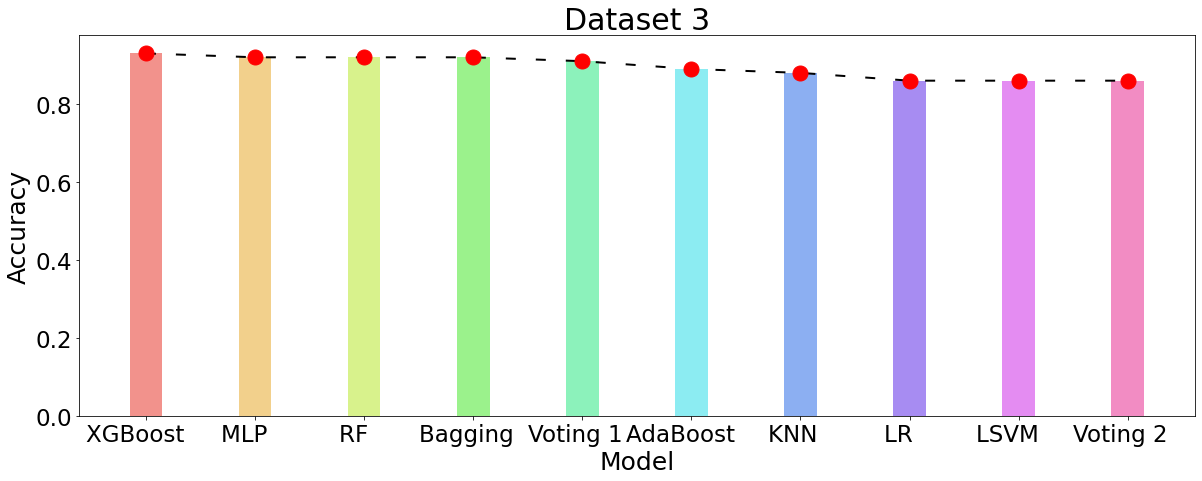

In [62]:
plt.figure(figsize=(20,7))
plt.bar(x=DS3_Best_Accuracy_df.index.map(lambda x : x.split("(")[0]),height=DS3_Best_Accuracy_df['Accuracy'],width=0.3,color=sns.hls_palette(10 , l = .75, s = .8))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.title('Dataset 3',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
x=plt.gca().xaxis.get_ticklocs() 
y=DS3_Best_Accuracy_df['Accuracy']
plt.plot(x,y,linestyle = (0,(5,10)),linewidth = 2, marker='o',color='black',
                                            markersize = 15, markeredgecolor='r', 
                                            markerfacecolor='r')
plt.show()

In [63]:
plt.figure(figsize=(30,8))
plt.bar(x=DS3_Best_Precision_df.index.map(lambda x : x.split("(")[0]),height=DS3_Best_Precision_df.sort_values['Precision'],width=0.3,color=sns.hls_palette(10 , l = .75, s = .8))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Precision',fontsize=25)
plt.title('Dataset 3',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()

In [64]:
plt.figure(figsize=(30,8))
plt.bar(x=DS3_Best_Recall_df.index.map(lambda x : x.split("(")[0]),height=DS3_Best_Recall_df['Recall'],width=0.3,color=sns.hls_palette(10 , l = .75, s = .8))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Recall',fontsize=25)
plt.title('Dataset 3',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()

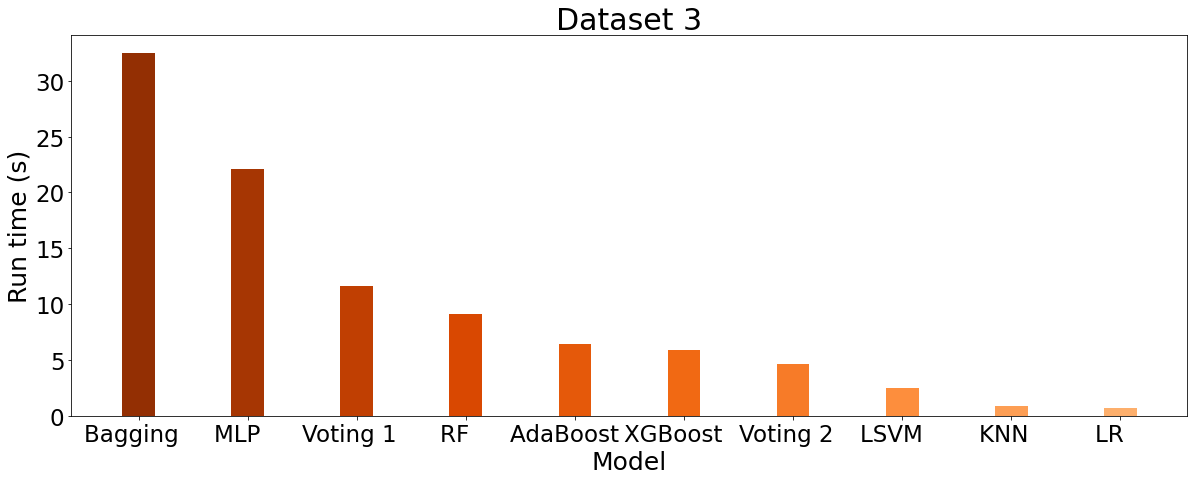

In [66]:
plt.figure(figsize=(20,7))
plt.bar(x=DS3_Best_Accuracy_df.sort_values(by='Run time (s)',ascending=False).index.map(lambda x : x.split("(")[0]),height=DS3_Best_Accuracy_df.sort_values(by='Run time (s)',ascending=False)['Run time (s)'],width=0.3,color=sns.color_palette('Oranges_r',15))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Run time (s)',fontsize=25)
plt.title('Dataset 3',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()

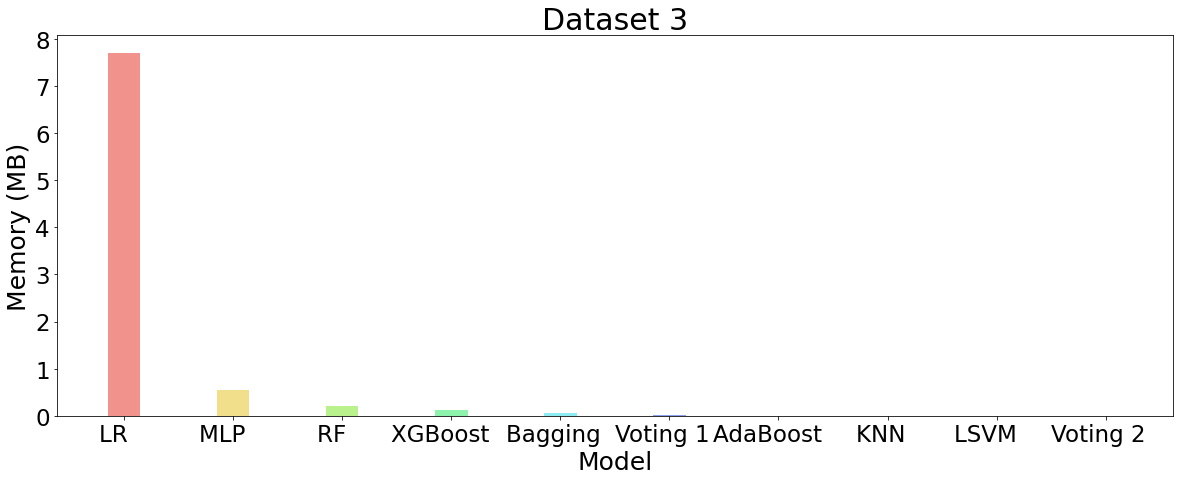

In [67]:
plt.figure(figsize=(20,7))
plt.bar(x=DS3_Best_Accuracy_df.sort_values(by='Memory (MB)',ascending=False).index.map(lambda x : x.split("(")[0]),height=DS3_Best_Accuracy_df.sort_values(by='Memory (MB)',ascending=False)['Memory (MB)'],width=0.3,color=sns.hls_palette(8 , l = .75, s = .8))
plt.xlabel('Model',fontsize=25)
plt.ylabel('Memory (MB)',fontsize=25)
plt.title('Dataset 3',fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.show()

## 7.4 Overall

In [68]:
DS1_N_df = DS1_res_df.groupby(by=['DS','N']).mean().round(2).reset_index()
DS1_N_df

,DS,N,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
0,1,1,0.98,0.98,0.98,0.98,71.84,11.35
1,1,2,0.88,0.85,0.92,0.88,44.67,11.33
2,1,3,0.73,0.90,0.59,0.68,36.48,9.14


<Figure size 576x720 with 0 Axes>

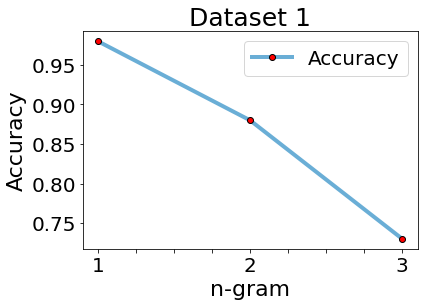

In [69]:
plt.figure(figsize=(8,10))
DS1_N_df.plot(kind='line', x='N',y='Accuracy',linestyle = '-',linewidth = 4,
                                              marker='o',color=sns.color_palette('Blues',1),
                                              markersize = 6, markeredgecolor='black', 
                                              markerfacecolor='r')
         
plt.xlabel('n-gram',fontsize=22)
plt.ylabel('Accuracy',fontsize=22)
plt.title('Dataset 1',fontsize=25)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [70]:
DS2_res_df['Accuracy']=DS2_res_df['Accuracy'].round(2)

In [71]:
DS2_N_df = DS2_res_df.groupby(by=['DS','N']).mean().round(2).reset_index()
DS2_N_df

,DS,N,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
0,2,1,0.79,0.76,0.83,0.79,54.26,18.00
1,2,2,0.81,0.77,0.87,0.82,31.36,5.60
2,2,3,0.80,0.77,0.84,0.78,22.95,18.51


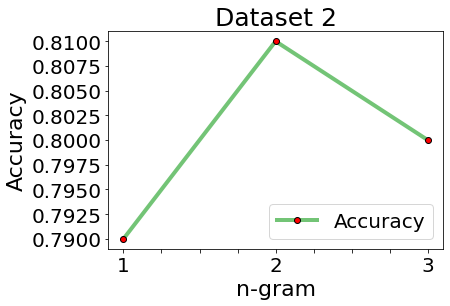

In [72]:
DS2_N_df.plot(kind='line', x='N',y='Accuracy',linestyle = '-',linewidth = 4,
                                              marker='o',color=sns.color_palette('Greens',1),
                                              markersize = 6, markeredgecolor='black', 
                                              markerfacecolor='r')
         
plt.xlabel('n-gram',fontsize=22)
plt.ylabel('Accuracy',fontsize=22)
plt.title('Dataset 2',fontsize=25)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

<Figure size 576x720 with 0 Axes>

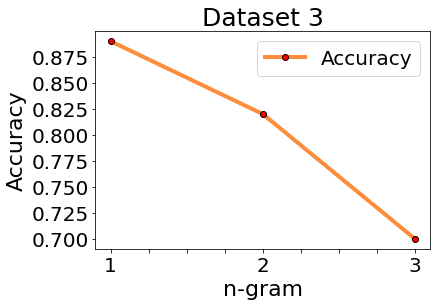

In [73]:
plt.figure(figsize=(8,10))
DS3_res_df.groupby(by=['DS','N']).mean().round(2).reset_index().plot(kind='line', x='N',y='Accuracy',
                                                                     linestyle = '-',linewidth = 4,
                                                                     marker='o',color=sns.color_palette('Oranges',1),
                                                                     markersize = 6, markeredgecolor='black', 
                                                                     markerfacecolor='r')
         
plt.xlabel('n-gram',fontsize=22)
plt.ylabel('Accuracy',fontsize=22)
plt.title('Dataset 3',fontsize=25)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [74]:
DS2_res_df.groupby(by=['DS','N']).mean().round(2)

Accuracy  Precision  Recall  F1-score  Run time (s)  Memory (MB)
DS N                                                                  
2  1      0.79       0.76    0.83      0.79         54.26        18.00
   2      0.81       0.77    0.87      0.82         31.36         5.60
   3      0.80       0.77    0.84      0.78         22.95        18.51

In [75]:
DS3_res_df.groupby(by=['DS','N']).mean().round(2)

Accuracy  Precision  Recall  F1-score  Run time (s)  Memory (MB)
DS N                                                                  
3  1      0.89       0.89    0.92      0.90         12.49         0.53
   2      0.82       0.80    0.89      0.83          6.93         0.21
   3      0.70       1.00    0.44      0.61          5.08         0.12

In [76]:
DS1_res_df.groupby(by=['DS','LM']).mean().round(2)

Accuracy  Precision  Recall  F1-score  Run time (s)  Memory (MB)
DS LM                                                                      
1  BoW         0.86       0.91    0.83      0.85         43.61        10.74
   TF-IDF      0.86       0.91    0.83      0.85         58.39        10.47

In [77]:
DS2_res_df.groupby(by=['DS','LM']).mean().round(2)

Accuracy  Precision  Recall  F1-score  Run time (s)  Memory (MB)
DS LM                                                                      
2  BoW          0.8       0.76    0.85       0.8         28.05        17.70
   TF-IDF       0.8       0.77    0.83       0.8         44.33        10.37

In [78]:
DS3_res_df.groupby(by=['DS','LM']).mean().round(2)

Accuracy  Precision  Recall  F1-score  Run time (s)  Memory (MB)
DS LM                                                                      
3  BoW          0.8       0.89    0.76      0.78          7.28         0.56
   TF-IDF       0.8       0.90    0.74      0.78          9.05         0.01

In [79]:
overall_df = pd.concat([DS1_res_df.groupby(by=['DS','N']).mean().round(2).reset_index(), DS2_res_df.groupby(by=['DS','N']).mean().round(2).reset_index(), DS3_res_df.groupby(by=['DS','N']).mean().round(2).reset_index()])

In [80]:
overall_df

,DS,N,Accuracy,Precision,Recall,F1-score,Run time (s),Memory (MB)
0,1,1,0.98,0.98,0.98,0.98,71.84,11.35
1,1,2,0.88,0.85,0.92,0.88,44.67,11.33
2,1,3,0.73,0.90,0.59,0.68,36.48,9.14
0,2,1,0.79,0.76,0.83,0.79,54.26,18.00
1,2,2,0.81,0.77,0.87,0.82,31.36,5.60
2,2,3,0.80,0.77,0.84,0.78,22.95,18.51
0,3,1,0.89,0.89,0.92,0.90,12.49,0.53
1,3,2,0.82,0.80,0.89,0.83,6.93,0.21
2,3,3,0.70,1.00,0.44,0.61,5.08,0.12


In [81]:
DS1_columns = [ w+' (DS1) ' for w in DS1_res_df.columns.tolist() ] 
DS2_columns = [ w+' (DS2) ' for w in DS2_res_df.columns.tolist() ] 
DS3_columns = [ w+' (DS3) ' for w in DS3_res_df.columns.tolist() ] 

In [82]:
all_df = pd.concat([DS1_res_df,DS2_res_df,DS3_res_df],axis=1)
all_df.columns = DS1_columns + DS2_columns + DS3_columns
all_df

,Accuracy (DS1),Precision (DS1),Recall (DS1),F1-score (DS1),Run time (s) (DS1),Memory (MB) (DS1),LM (DS1),N (DS1),ML (DS1),DS (DS1),...,Accuracy (DS3),Precision (DS3),Recall (DS3),F1-score (DS3),Run time (s) (DS3),Memory (MB) (DS3),LM (DS3),N (DS3),ML (DS3),DS (DS3)
RF (TF-IDF) (n=1),0.996,0.998,0.993,0.996,59.886,12.703,TF-IDF,1,RF,1,...,0.92,0.93,0.92,0.92,12.39,0.18,TF-IDF,1,RF,3
Bagging (BoW) (n=1),0.996,0.998,0.993,0.996,198.237,5.359,BoW,1,Bagging,1,...,0.92,0.92,0.93,0.92,32.45,0.07,BoW,1,Bagging,3
RF (BoW) (n=1),0.995,0.998,0.993,0.996,27.450,1.219,BoW,1,RF,1,...,0.92,0.93,0.92,0.92,9.14,0.20,BoW,1,RF,3
Bagging (TF-IDF) (n=1),0.995,0.998,0.993,0.996,476.377,2.730,TF-IDF,1,Bagging,1,...,0.91,0.93,0.91,0.92,78.75,0.00,TF-IDF,1,Bagging,3
XGBoost (TF-IDF) (n=1),0.995,0.998,0.993,0.996,61.531,0.180,TF-IDF,1,XGBoost,1,...,0.92,0.92,0.94,0.93,8.78,0.02,TF-IDF,1,XGBoost,3
XGBoost (BoW) (n=1),0.995,0.997,0.994,0.995,35.989,8.977,BoW,1,XGBoost,1,...,0.93,0.93,0.95,0.94,5.87,0.12,BoW,1,XGBoost,3
Voting 1 (BoW) (n=1),0.994,0.998,0.990,0.994,60.934,18.855,BoW,1,Voting 1,1,...,0.91,0.90,0.93,0.91,11.58,0.01,BoW,1,Voting 1,3
MLP (BoW) (n=1),0.993,0.992,0.993,0.993,106.860,1.348,BoW,1,MLP,1,...,0.92,0.90,0.95,0.93,22.10,0.54,BoW,1,MLP,3
Voting 2 (BoW) (n=1),0.993,0.998,0.988,0.993,38.346,44.742,BoW,1,Voting 2,1,...,0.86,0.83,0.93,0.88,4.66,0.00,BoW,1,Voting 2,3
LR (BoW) (n=1),0.992,0.997,0.988,0.992,1.961,0.020,BoW,1,LR,1,...,0.86,0.83,0.93,0.88,0.73,7.69,BoW,1,LR,3
